# Predicting Financial Loan status using Machine Learning to sanction loans
In this case study we are usinng the dataset of the applicants and predicting the loan status based on their assets, income, financial status etc., First the dataset has been cleaned by replacing all the null values with mean, mode based on the columns. Then a thorough analysis has been done on the data by plotting the graphs with different attributes so as to understand the data. Then the statistics of the data has been pulled to know the real stats involved in the data.

In [1]:
#importing the libraries and other dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
#sns.set(style='white')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Load the Dataset
Data is loaded and it is checked for the type and then the 5 rows of the dataset is loaded.

In [2]:
#loading the dataset

loan_data = pd.read_csv("D:\Classes\CF969\Project\Financial_loans.csv")

In [3]:
#checking the type of loaded data

type(loan_data)

#printing the first 5 rows from the loaded DF

loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Features in the dataset

loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Understanding Data

In [5]:
#understanding the dataset

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1228 non-null   object 
 1   Gender             1202 non-null   object 
 2   Married            1222 non-null   object 
 3   Dependents         1198 non-null   object 
 4   Education          1228 non-null   object 
 5   Self_Employed      1164 non-null   object 
 6   ApplicantIncome    1228 non-null   int64  
 7   CoapplicantIncome  1228 non-null   float64
 8   LoanAmount         1184 non-null   float64
 9   Loan_Amount_Term   1200 non-null   float64
 10  Credit_History     1128 non-null   float64
 11  Property_Area      1228 non-null   object 
 12  Loan_Status        1228 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 124.8+ KB


### Summary
- There are 13 features
- There are 8 object data types
- There are 4 float and 1 int datatype

In [6]:
#statistics of the data

loan_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
count,1228.000000,1228.000000,1184.000000,1128.000000
mean,5403.459283,1621.245798,146.412162,0.842199
std,6106.551744,2925.055686,85.551144,0.364716
min,150.000000,0.000000,9.000000,0.000000
25%,2876.000000,0.000000,100.000000,1.000000
50%,3812.500000,1188.500000,128.000000,1.000000
75%,5800.000000,2302.000000,168.000000,1.000000
max,81000.000000,41667.000000,700.000000,1.000000


In [7]:
# Printing a table with the below attributes

loan_data[['Gender','Married','Dependents','Education']].describe(include='all')

,Gender,Married,Dependents,Education
count,1202,1222,1198,1228
unique,2,2,4,2
top,Male,Yes,0,Graduate
freq,978,796,690,960


In [8]:
# counting the number of missing in every column

loan_data.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status            0
dtype: int64

### Univariate Analysis for categorical features
In the univariate analysis, the data is explored with respect to each column and the corresponding values in the data are printed inorder to have a brief idea about the data being used. The plots are drawn only for the single parameter in the univariate analysis.

In [9]:
loan_data['Loan_Status'].value_counts()

Y    844
N    384
Name: Loan_Status, dtype: int64

In [10]:
# to fetch the proportions
100* loan_data['Loan_Status'].value_counts(normalize=True)

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

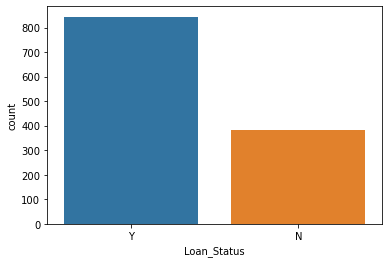

In [11]:
# Bar graph for loan_status
sns.countplot(x="Loan_Status", data=loan_data)

In [12]:
# Gender proportion

100 * loan_data['Gender'].value_counts(normalize=True)

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

In [13]:
# counting dependants

loan_data['Dependents'].value_counts()

0     690
1     204
2     202
3+    102
Name: Dependents, dtype: int64

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

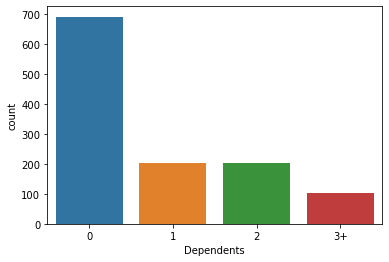

In [14]:
# Bar graph for dependents 
sns.countplot(loan_data['Dependents'])

In [15]:
loan_data['Education'].value_counts()

Graduate        960
Not Graduate    268
Name: Education, dtype: int64

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

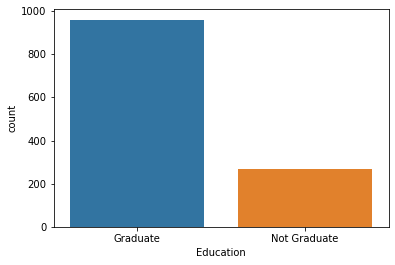

In [16]:
sns.countplot("Education", data=loan_data)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

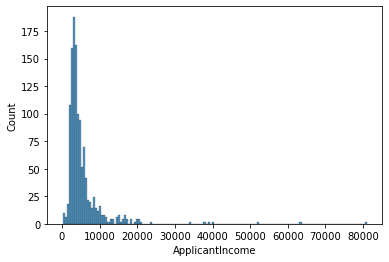

In [17]:
sns.histplot(loan_data.ApplicantIncome)

### Hidden insights drawn from the above plot
- Majority of the applicants income lies between 7500 - 9000 £

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

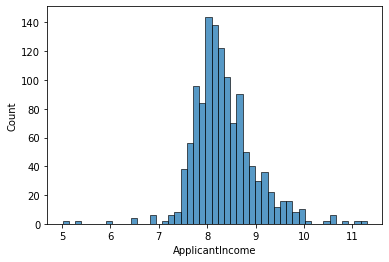

In [18]:
sns.histplot(np.log(loan_data.ApplicantIncome))  # After log transformation 

- Most of the co applicant income ranges from 500 - 2200 £ (aaprox)

- sns.text()- research

# Bivariate Analysis
In the Bivariate analysis we are analyse the two variables, from this we can understand how one feature is affecting the other in terms of the continous as well as categorical values. Bivariate analysis is helpful in simple hypothesis of testing and exploration of the data.

In [19]:
# Tabling the applicants loan status with respect to property area

property_group = loan_data.pivot_table(index='Property_Area',columns="Loan_Status", values='Loan_ID',aggfunc=len)
property_group

Loan_Status,N,Y
Property_Area,,
Rural,138,220
Semiurban,108,358
Urban,138,266


In [20]:
#Counting the number of loan sanctioned with respect to property area

loan_data.Property_Area.value_counts()

Semiurban    466
Urban        404
Rural        358
Name: Property_Area, dtype: int64

- Applicants residing in the Semi urban have the highest loan sanctioned when compared to Rural and Urban

In [21]:
# Fetching average income of genders with respect to education

round(loan_data.groupby(['Gender','Education'])['ApplicantIncome'].mean(),2)

Gender  Education   
Female  Graduate        4646.47
        Not Graduate    4629.70
Male    Graduate        5992.35
        Not Graduate    3630.06
Name: ApplicantIncome, dtype: float64

- Surprisingly female graduate and not graduates have almost similar income
- Male applicants non graduates have vast differences in the income when compared with graduate
- So, graduates are most likely to get loan sanctioned

<AxesSubplot:xlabel='Married', ylabel='count'>

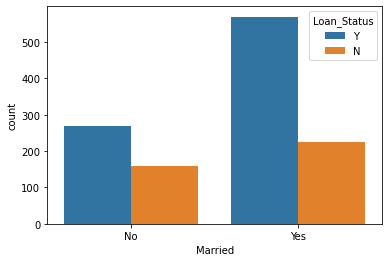

In [22]:
sns.countplot(x="Married", data = loan_data, hue="Loan_Status")

- Married applicants has the most chances of getting the loans


In [23]:
# len signifies count

loan_data.pivot_table(index = "Married", columns="Loan_Status", values='Loan_ID',aggfunc=len) # agg = sum()

Loan_Status,N,Y
Married,,
No,158,268
Yes,226,570


# Bivariate for continous variables
Here the data is explored for the continous variables where there is a continous flow of the values. Same as Bivariate analysis, the bivariate continous analysis uses the nemerical continous values for the analysis.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

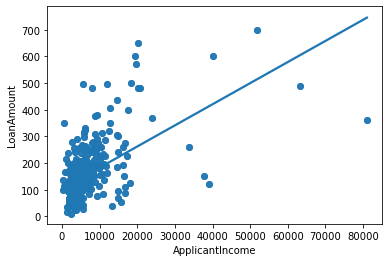

In [24]:
# regression plot

sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = loan_data,ci=False)

- There seems to be positive relationship between loan_amt and Applicant income
- As the applicant income increases the loan amount also increases
- There is one outlier which will be sorted out at pre-processing or exploratory data analysis

# EDA (Exploratory Data Analysis)
In EDA we check the presence of null values in the dataset and replace them with the values however we want as in mean, mode or dropping them. This cleans the data for our usage. Here the values of the dependents with 3+ is replaced by 3. Also the Yes/No, Graduate/NonGraduate cells are replaced with machine language i.e in numbers.


In [25]:
# Checking the missing values

miss_val = loan_data.isnull().sum()

In [26]:
# replacing the missing values with the mode
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)

In [27]:
# replacing the null vlaues with the mode

loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

In [28]:
# checking the dependents counts individually

loan_data['Dependents'].value_counts()

0     690
1     204
2     202
3+    102
Name: Dependents, dtype: int64

In [29]:
# replacing 3+ in Dependents variable with 3

loan_data['Dependents'].replace(to_replace ='3+', value='3',inplace=True)

In [30]:
# Replace missing values

loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
# since the distribution is sslightly skewed to the right, median is used for imputation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

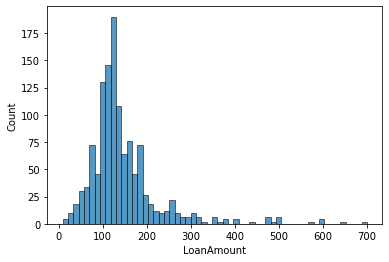

In [31]:
#plotting the histogram

sns.histplot(data = loan_data, x = 'LoanAmount')

In [32]:
# Drop rows where credit history is null

loan_data = loan_data[loan_data.Credit_History.notnull()]

In [33]:
# imputations of the data

loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [34]:
# checking the number of null values

loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           30
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

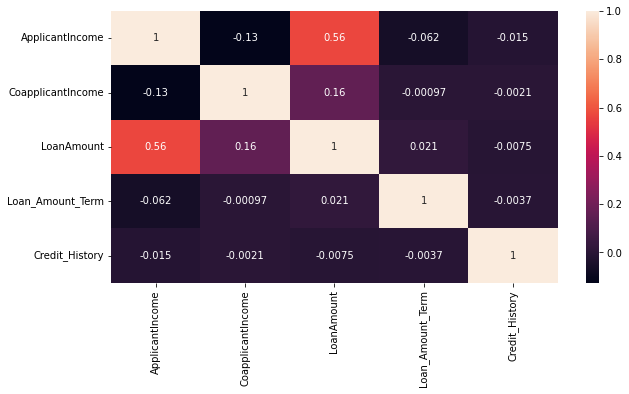

In [35]:
# Print correlation matrix to understand relationship between variables
matrix = loan_data.corr()
# print(matrix)
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(10,5)

In [36]:
# Loan_amount is totally dependent on the Applicant_income, consequenlty it is the best faeture

In [37]:
 # changing the labelling of the parameters
    
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [38]:
# printing the first 5 rows after label encoding
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [39]:
#checking the vlaues in the dependents column

loan_data['Dependents'].value_counts()

0    632
2    190
1    180
3     96
Name: Dependents, dtype: int64

In [40]:
# Dropping the features as there is no use for the predictive analysis

loan_data.drop(['Loan_ID'],axis=1,inplace=True)

In [41]:
# Dropping the features as there is no use for the predictive analysis

loan_data.drop(['Dependents'],axis=1,inplace=True)

In [42]:
 # changing the labelling of the parameters
    
#loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1, 'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 #'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}},inplace = True) 



* I'm using one hot encoding instaed of replacing all the categorical features

### Spliting dataset as dependent and independent variable
Here we are doing the one hot encoding to convert and process the categorical values to a machine learning language so it can used in the predictions. In latter steps the data is converted to train set and test set to further do the analysis. We have taken the traiing set data for 80% and test dataset as 20%. Then different classifiers such as Naive Bayes, knn, Svm are used to check the accuracy of the models we have taken and finally the highest accuracy model is printed.

In [43]:

X = loan_data.drop(columns=['Loan_Status'])
y = loan_data.Loan_Status

In [44]:
# One hot encoding for X feature

X = pd.get_dummies(X)  # One Hot Encoding 

In [45]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [46]:
#checking dimensions post encoding 

X.info(), X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 0 to 1227
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          1128 non-null   int64  
 1   CoapplicantIncome        1128 non-null   float64
 2   LoanAmount               1128 non-null   float64
 3   Loan_Amount_Term         1128 non-null   float64
 4   Credit_History           1128 non-null   float64
 5   Gender_Female            1128 non-null   uint8  
 6   Gender_Male              1128 non-null   uint8  
 7   Married_No               1128 non-null   uint8  
 8   Married_Yes              1128 non-null   uint8  
 9   Education_Graduate       1128 non-null   uint8  
 10  Education_Not Graduate   1128 non-null   uint8  
 11  Self_Employed_No         1128 non-null   uint8  
 12  Self_Employed_Yes        1128 non-null   uint8  
 13  Property_Area_Rural      1128 non-null   uint8  
 14  Property_Area_Semiurban 

(None, (1128, 16))

In [47]:
# splitting the dependent and independent features using train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
# Importing packages of logistic regression and evaluation 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [49]:
# Normalizing the training dataset

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [50]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Classifier - 1, Training the train dataset with NaiveBayes classifier

In [51]:
#classifier 1
#NaiveBayes
from sklearn.naive_bayes import GaussianNB #importing naivebayes classifier from sklearn
clf_nb = GaussianNB() 
clf_nb.fit(X_train_scaled,y_train)

GaussianNB()

#### Classifier - 2, Training the train dataset with 'k nearest neighbour(knn)' classifier

In [52]:
#classifier 2
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

#### Classifier - 3, Training the train dataset with 'Support Vector Machine(SVM)' classifier

In [53]:
#classifier 3
#Support Vector Machine
from sklearn import svm
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train_scaled,y_train)

C:\Users\sudha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

#### Comparing all the classifiers accuracies

In [54]:
classifiers = [clf_nb, clf_knn,clf_svm]
accuracy_scores = [accuracy_score(clf.predict(X_test_scaled) ,y_test) for clf in classifiers]
index = np.argmax(accuracy_scores)
print(accuracy_scores)
print(classifiers[index])
print('Highest_accuracy:', accuracy_scores[index])

[0.8008849557522124, 0.8097345132743363, 0.8141592920353983]
LinearSVC()
Highest_accuracy: 0.8141592920353983


##### From below the highest accuracy for the classifier linear support vector machine classifier
- The highest accuracy is 81.41%